In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
dataCleveland = pd.read_csv("../datasets/processed.cleveland.csv", sep = "\t", lineterminator='\r')
dataHungarian = pd.read_csv("../datasets/processed.Hungarian.csv", sep = "\t", lineterminator='\r')
dataSwitzerland = pd.read_csv("../datasets/processed.switzerland.csv")
dataVA = pd.read_csv("../datasets/processed.va.csv")


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\GTSA-I~1\AppData\Local\Temp/ipykernel_10628/3462665596.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# COLUMN DESCRIPTION:

- int age - age in years
- int sex - sex (1 = male; 0 = female)
- int cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- int trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- int chol - serum cholestoral in mg/dl
- int fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- int restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
- int thalach - maximum heart rate achieved
- int exang - exercise induced angina (1 = yes; 0 = no)
- float oldpeak - ST depression induced by exercise relative to rest
- int slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
- int ca - number of major vessels (0-3) colored by flourosopy
- int thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- int num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

To summarize: 

- numerical are: age, trestbps, chol, thalac, oldpeak
- categorical are: sex, cp, fbs, restecg, exang, slope, ca, thal
- our class/target is the column class

In [5]:
#dataHungarian.head(10)
#dataSwitzerland.head(10)
dataVA.head(10)
#dataCleveland.head(10)

age  sex  cp trestbps chol fbs  restecg thalach exang oldpeak slope ca  \
0  63   1    4   140      260  0   1        112     1     3       2     ?   
1  44   1    4   130      209  0   1        127     0     0       ?     ?   
2  60   1    4   132      218  0   1        140     1     1.5     3     ?   
3  55   1    4   142      228  0   1        149     1     2.5     1     ?   
4  66   1    3   110      213  1   2        99      1     1.3     2     ?   
5  66   1    3   120      0    0   1        120     0     -0.5    1     ?   
6  65   1    4   150      236  1   1        105     1     0       ?     ?   
7  60   1    3   180      0    0   1        140     1     1.5     2     ?   
8  60   1    3   120      0    ?   0        141     1     2       1     ?   
9  60   1    2   160      267  1   1        157     0     0.5     2     ?   

  thal  class  
0  ?    2      
1  ?    0      
2  ?    2      
3  ?    1      
4  ?    0      
5  ?    0      
6  ?    3      
7  ?    0      
8  ?    3      
9  ?    1

In [6]:
dataHungarian.rename(columns = {"class": "num"}, inplace=True)
dataSwitzerland.rename(columns = {"class": "num"}, inplace=True)
dataVA.rename(columns = {"class": "num"}, inplace=True)

In [7]:
frames = [dataCleveland, dataSwitzerland, dataVA, dataHungarian]
dataAll = pd.concat(frames)
dataAll.head()

age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0  63.0  1.0  1.0  145.0    233.0  1.0  2.0     150.0   0.0   2.3     3.0    
1  67.0  1.0  4.0  160.0    286.0  0.0  2.0     108.0   1.0   1.5     2.0    
2  67.0  1.0  4.0  120.0    229.0  0.0  2.0     129.0   1.0   2.6     2.0    
3  37.0  1.0  3.0  130.0    250.0  0.0  0.0     187.0   0.0   3.5     3.0    
4  41.0  0.0  2.0  130.0    204.0  0.0  2.0     172.0   0.0   1.4     1.0    

    ca thal  num  
0  0.0  6.0  0    
1  3.0  3.0  2    
2  2.0  7.0  1    
3  0.0  3.0  0    
4  0.0  3.0  0

In [8]:
dataCleveland.shape
#dataHungarian.dtypes;
#dataSwitzerland.dtypes;
#dataVA.dtypes;

(303, 14)

In [9]:
dataCleveland.eq("?").sum()
#dataHungarian.eq("?").sum()
#dataSwitzerland.eq("?").sum()
#dataVA.eq("?").sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

# Playaround with DataCleveland since it contains least ?
- drop ? and check that we lost 6 rows
- Correct datatypes
- Heatmap
- PCA
- classification
    drop class label in a new frame
    normalize data

In [10]:
#Drop rows with ?
newCleveland = dataCleveland.copy()
newCleveland = newCleveland[newCleveland.ca != "?"]
newCleveland = newCleveland[newCleveland.thal != "?"]
newCleveland = newCleveland[newCleveland.trestbps != "?"]
newCleveland = newCleveland[newCleveland.chol != "?"]
newCleveland = newCleveland[newCleveland.fbs != "?"]
newCleveland = newCleveland[newCleveland.restecg != "?"]
newCleveland = newCleveland[newCleveland.thalach != "?"]
newCleveland = newCleveland[newCleveland.exang != "?"]
newCleveland = newCleveland[newCleveland.oldpeak != "?"]
newCleveland = newCleveland[newCleveland.slope != "?"]
newCleveland = newCleveland[newCleveland.exang != "?"]


In [11]:
newCleveland["num"].replace({2: 1, 3: 1, 4: 1}, inplace = True)
newCleveland.shape

(297, 14)

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [13]:
scoring_measures = ["accuracy", "recall", "precision", "f1"]
models = []


In [14]:
clf = SVC()
models.append(clf)
neigh = KNeighborsClassifier(n_neighbors=10)
models.append(neigh)
logreg = LogisticRegression(solver='liblinear')
models.append(logreg)


In [15]:
X = newCleveland.drop("num", axis=1)
y = newCleveland.iloc[:,-1]
y.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

In [16]:
X1 = newCleveland.drop("num", axis=1)
y1 = newCleveland['num']
y1.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

In [17]:

for model in models:
    print(model)
    scores = cross_validate(model, X, y, cv=5, scoring=scoring_measures)
    scores = pd.DataFrame.from_dict(scores)
    scores = scores.transpose()
    scores['mean'] = scores.mean(axis=1)
    print(scores, "\n")
    print(scores.at['test_accuracy', 'mean'])
    

SVC()
                       0         1         2         3         4      mean
fit_time        0.004001  0.004001  0.003501  0.003000  0.003001  0.003501
score_time      0.004500  0.004000  0.004000  0.004001  0.004000  0.004100
test_accuracy   0.633333  0.633333  0.745763  0.694915  0.661017  0.673672
test_recall     0.392857  0.392857  0.592593  0.592593  0.444444  0.483069
test_precision  0.687500  0.687500  0.800000  0.695652  0.705882  0.715307
test_f1         0.500000  0.500000  0.680851  0.640000  0.545455  0.573261 

0.6736723163841807
KNeighborsClassifier(n_neighbors=10)
                       0         1         2         3         4      mean
fit_time        0.002000  0.002001  0.001500  0.001500  0.002000  0.001800
score_time      0.005001  0.005001  0.005001  0.005001  0.004501  0.004901
test_accuracy   0.633333  0.650000  0.644068  0.745763  0.627119  0.660056
test_recall     0.500000  0.464286  0.518519  0.666667  0.481481  0.526190
test_precision  0.636364  0.684211  

In [18]:

scores = cross_validate(clf, X, y, cv=5, scoring=scoring_measures)

In [19]:
scores = pd.DataFrame.from_dict(scores)
scores

fit_time  score_time  test_accuracy  test_recall  test_precision   test_f1
0  0.004001  0.004499    0.633333       0.392857     0.687500        0.500000
1  0.003500  0.004002    0.633333       0.392857     0.687500        0.500000
2  0.003500  0.004000    0.745763       0.592593     0.800000        0.680851
3  0.003501  0.004001    0.694915       0.592593     0.695652        0.640000
4  0.003500  0.003501    0.661017       0.444444     0.705882        0.545455

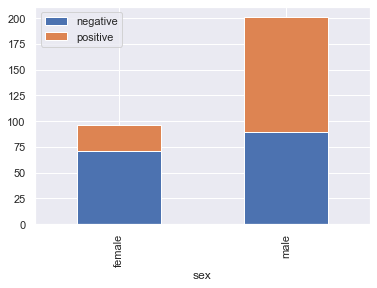

In [20]:
"""
Groupby: allows you to group together rows based on a column and perform an aggregate function on them. 
After groupby, specify a summarization function!

To plot: 
Call unstack, that pivots the grouped dataframe back, and just call plot with kind equals to bar!

stacked: The bars for the different class labels will be put one top of each other, instead of next to each other. 
Convert it to False if you want to see the difference
"""

ylabels = ['negative', 'positive']
labels = ("female", "male")

positions = (0, 1)

s_x = newCleveland.groupby("sex")['num'].value_counts()
s_x.unstack().plot(kind='bar', stacked= True)

plt.legend(labels=ylabels)
plt.xticks(positions, labels)
plt.show()


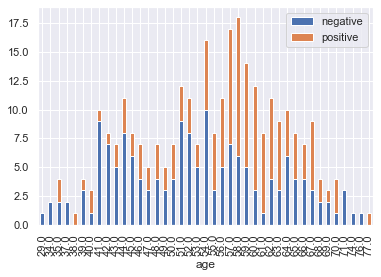

In [21]:
"""
Same procedure: 

"""

by_age= newCleveland.groupby(["age"])['num'].value_counts()
by_age.unstack().plot(kind='bar', stacked=True)
plt.legend(labels=ylabels)
plt.show()

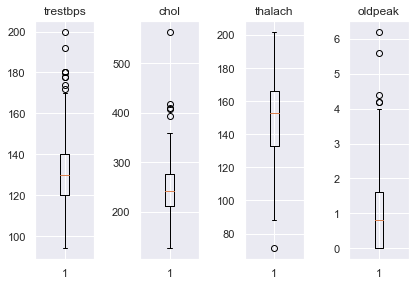

In [22]:
#Data visualisation 

fig, ax = plt.subplots(1, 4)

plt.tight_layout()
ax[0].boxplot(newCleveland['trestbps'])
ax[0].set_title("trestbps")

ax[1].set_title('chol')
ax[1].boxplot(newCleveland["chol"])

ax[2].set_title('thalach')
ax[2].boxplot(newCleveland["thalach"])

ax[3].set_title('oldpeak')
ax[3].boxplot(newCleveland["oldpeak"])
plt.show()

C:\Users\GTSA - Infinity\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


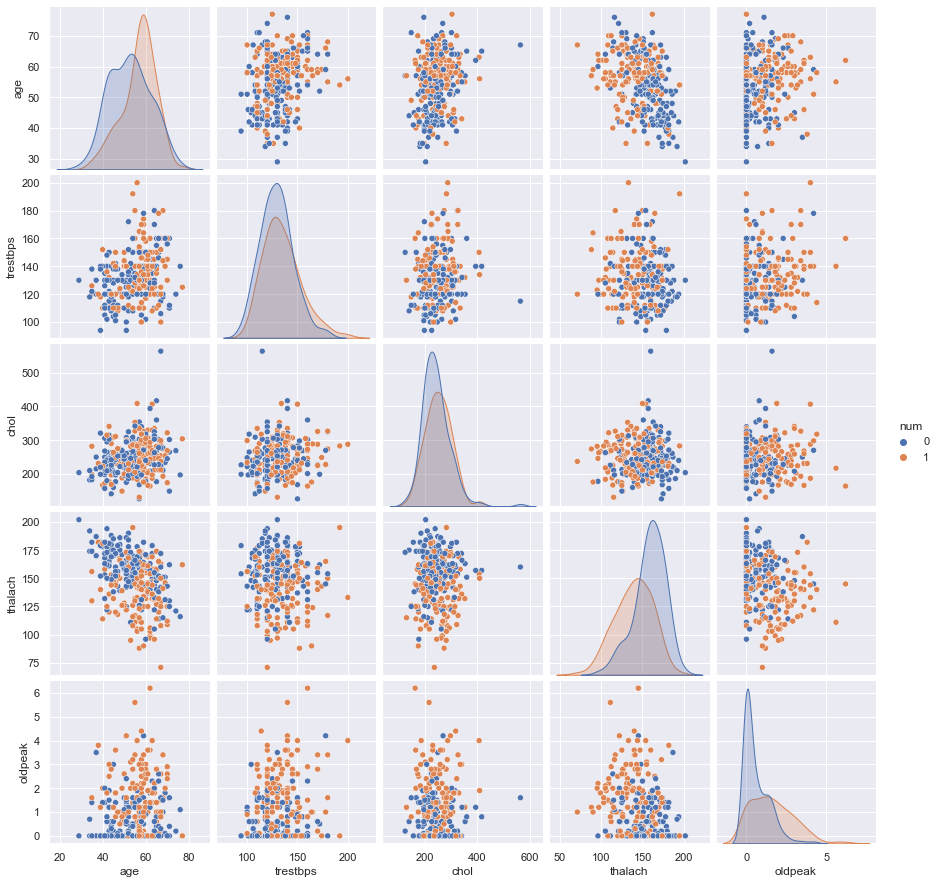

In [23]:
"""
Pairplot from seaborn:  investigates pairwise relationships.

Make a list of the numerical values, and in hue pass the class!


On the diagonal you see the distribution of these diffeent numerical variables

"""
sns.pairplot(newCleveland[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']], hue='num', size=2.5)

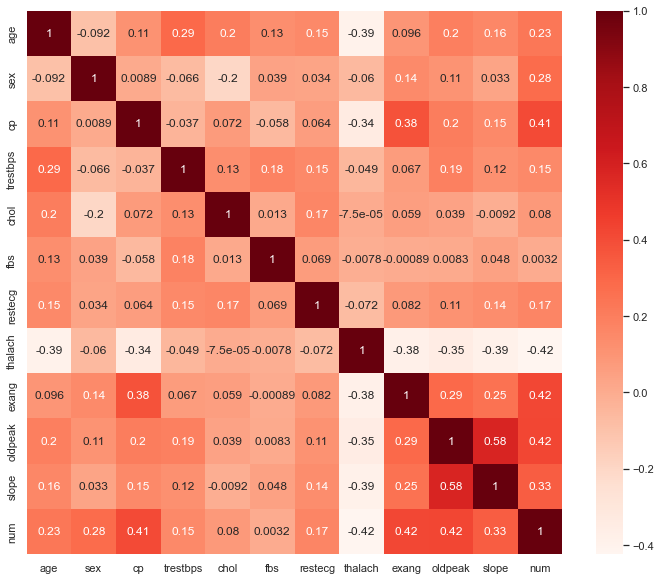

In [24]:
#Correlation heatmap
#Using Pearson Correlation

plt.figure(figsize=(12,10))

#Computes pairwise correlation of columns, excluding NA/null value. returns 
cor = newCleveland.corr()

#Plots rectangular data as a color-encoded matrix. note that we are using seaborn. The parameter data needs to be rectangular dataset of pairwise correlations
sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds);

plt.show()

# Classification

In [25]:
X = newCleveland.drop("num", axis = 1)
y = newCleveland.num


In [26]:
X = pd.get_dummies(X, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [27]:
X.head()

age  trestbps   chol  thalach  oldpeak  sex_0.0  sex_1.0  cp_1.0  cp_2.0  \
0  63.0  145.0     233.0  150.0    2.3      0        1        1       0        
1  67.0  160.0     286.0  108.0    1.5      0        1        0       0        
2  67.0  120.0     229.0  129.0    2.6      0        1        0       0        
3  37.0  130.0     250.0  187.0    3.5      0        1        0       0        
4  41.0  130.0     204.0  172.0    1.4      1        0        0       1        

   cp_3.0  cp_4.0  fbs_0.0  fbs_1.0  restecg_0.0  restecg_1.0  restecg_2.0  \
0  0       0       0        1        0            0            1             
1  0       1       1        0        0            0            1             
2  0       1       1        0        0            0            1             
3  1       0       1        0        1            0            0             
4  0       0       1        0        0            0            1             

   exang_0.0  exang_1.0  slope_1.0  slope_2.0  slope_3.0  ca_0.0  ca_1.0  \
0  1          0          0          0          1          1       0        
1  0          1          0          1          0          0       0        
2  0          1          0          1          0          0       0        
3  1          0          0          0          1          1       0        
4  1          0          1          0          0          1       0        

   ca_2.0  ca_3.0  thal_3.0  thal_6.0  thal_7.0  
0  0       0       0         1         0         
1  0       1       1         0         0         
2  1       0       0         0         1         
3  0       0       1         0         0         
4  0       0       1         0         0

In [28]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[columns_to_scale] = standardScaler.fit_transform(X[columns_to_scale])
newClevelandNorm = X
newClevelandNorm.head()


age  trestbps      chol   thalach   oldpeak  sex_0.0  sex_1.0  cp_1.0  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965  0        1        1        
1  1.378929  1.596266  0.744555 -1.816334  0.381773  0        1        0        
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662  0        1        0        
3 -1.941680 -0.095506  0.051047  1.633010  2.099753  0        1        0        
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874  1        0        0        

   cp_2.0  cp_3.0  cp_4.0  fbs_0.0  fbs_1.0  restecg_0.0  restecg_1.0  \
0  0       0       0       0        1        0            0             
1  0       0       1       1        0        0            0             
2  0       0       1       1        0        0            0             
3  0       1       0       1        0        1            0             
4  1       0       0       1        0        0            0             

   restecg_2.0  exang_0.0  exang_1.0  slope_1.0  slope_2.0  slope_3.0  ca_0.0  \
0  1            1          0          0          0          1          1        
1  1            0          1          0          1          0          0        
2  1            0          1          0          1          0          0        
3  0            1          0          0          0          1          1        
4  1            1          0          1          0          0          1        

   ca_1.0  ca_2.0  ca_3.0  thal_3.0  thal_6.0  thal_7.0  
0  0       0       0       0         1         0         
1  0       0       1       1         0         0         
2  0       1       0       0         0         1         
3  0       0       0       1         0         0         
4  0       0       0       1         0         0

## Designate your attributes (X) and class labels (y)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(newClevelandNorm, y, test_size=0.3, random_state=0)
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=10, criterion="entropy")
clf = clf.fit(X_train, y_train)

## Building and Evaluating Decision Trees

[Text(155.8244680851064, 205.35999999999999, 'X[10] <= 0.5\nentropy = 0.995\nsamples = 207\nvalue = [112, 95]'),
 Text(80.13829787234043, 181.2, 'X[0] <= 0.217\nentropy = 0.695\nsamples = 107\nvalue = [87, 20]'),
 Text(28.493617021276595, 157.04, 'X[27] <= 0.5\nentropy = 0.387\nsamples = 66\nvalue = [61, 5]'),
 Text(14.246808510638298, 132.88, 'X[4] <= 2.143\nentropy = 0.139\nsamples = 51\nvalue = [50, 1]'),
 Text(7.123404255319149, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(21.370212765957447, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(42.740425531914894, 132.88, 'X[2] <= -0.373\nentropy = 0.837\nsamples = 15\nvalue = [11, 4]'),
 Text(35.61702127659574, 108.72, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(49.86382978723404, 108.72, 'X[21] <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(42.740425531914894, 84.56, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(56.98723404255319, 84.56, 'X[1] <= -0.941\nentropy = 0.811\ns

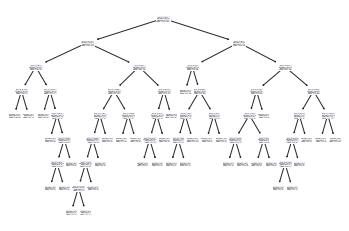

In [30]:
tree.plot_tree(clf.fit(X_train, y_train))

In [31]:
ypred = clf.predict(X_test)
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        48
           1       0.79      0.74      0.77        42

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



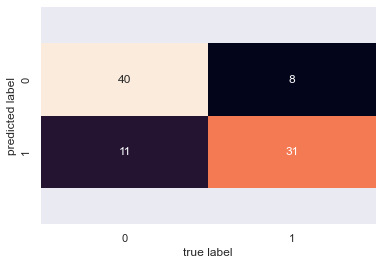

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred, y_test)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

## Building and Evaluating Random Forests

In [33]:
forest = RandomForestClassifier(n_estimators=10, max_depth=5, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=0)

In [34]:
ypredbag = forest.predict(X_test)

In [35]:
print(metrics.classification_report(y_test, ypredbag))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        48
           1       0.78      0.74      0.76        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



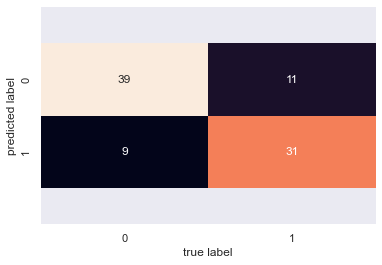

In [36]:
mat = confusion_matrix(y_test, ypredbag)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## Building and Evaluating Support Vector Machines


In [37]:
from sklearn.svm import SVC
#svm = SVC(kernel='linear')
#svm = SVC(kernel='poly', gamma='auto')
svm = SVC(kernel='rbf', gamma='auto', probability=True)

svm.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [38]:
ypredsvm = svm.predict(X_test)

In [39]:
print(metrics.classification_report(y_test, ypredsvm))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        48
           1       0.85      0.67      0.75        42

    accuracy                           0.79        90
   macro avg       0.80      0.78      0.78        90
weighted avg       0.80      0.79      0.79        90



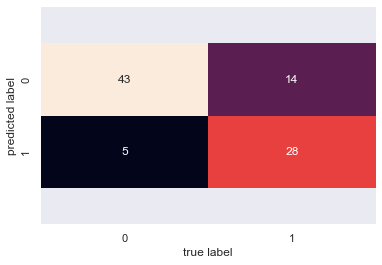

In [40]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypredsvm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

## new classifier   

In [41]:
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.7666666666666667

In [42]:
ypred = clf.predict(X_test)
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        48
           1       0.82      0.64      0.72        42

    accuracy                           0.77        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.77      0.77      0.76        90



## LIME

In [43]:
import lime
from lime import lime_tabular

instance_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names = X_train.columns,
    class_names=[1, 0],
    mode='classification'
)

In [61]:
X_test.iloc[5].ndim
#y_test.iloc[5]

1

In [65]:
a_2d = np.arange(12).reshape((3, 4))
print(a_2d[2])

[ 8  9 10 11]


In [45]:
#Heart disease explanations - y_test.iloc[5]
exp = instance_explainer.explain_instance(
    data_row=X_test.iloc[5],
    predict_fn=svm.predict_proba
)

In [46]:
exp.show_in_notebook(show_table=True)

In [47]:
print(y_test.iloc[11])

0


In [48]:
#No heart disease explanations - y_test.iloc[0]
exp = instance_explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=svm.predict_proba
)

In [49]:
exp.show_in_notebook(show_table=True)

# PCA

In [50]:
numerical = ["age", "trestbps", "chol", "thalach", "oldpeak"] #list of num features

X = newCleveland[numerical]


scaler = StandardScaler().fit(X)

data_scaled = scaler.transform(X)

data_scaled = pd.DataFrame(data_scaled, columns=numerical)
data_scaled.head(5)

age  trestbps      chol   thalach   oldpeak
0  0.936181  0.750380 -0.276443  0.017494  1.068965
1  1.378929  1.596266  0.744555 -1.816334  0.381773
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662
3 -1.941680 -0.095506  0.051047  1.633010  2.099753
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874

In [51]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data_scaled)

In [52]:
data_scaled.shape
x_pca

array([[-1.24710764e+00, -1.06437187e-01],
       [-2.67280824e+00,  3.75987186e-01],
       [-1.51925346e+00, -1.21168859e+00],
       [ 9.76608688e-01, -1.69666634e-01],
       [ 1.43817148e+00, -4.41458290e-01],
       [ 9.46805734e-01,  2.46376847e-01],
       [-1.52925690e+00,  6.54308055e-02],
       [ 1.06942294e-01,  1.58428779e+00],
       [-7.18657196e-01,  1.29097209e-02],
       [-5.86395101e-01, -8.85361990e-01],
       [ 1.37148423e-01, -3.55999059e-01],
       [-5.02956605e-01,  8.39240275e-01],
       [-7.90280993e-02,  6.86380912e-02],
       [ 1.78897711e+00,  5.67770369e-01],
       [-9.74109249e-03,  6.84330893e-01],
       [ 1.21308094e-01, -2.47262754e-01],
       [ 1.39671681e+00, -4.53868482e-01],
       [ 6.22697805e-02,  2.49704139e-01],
       [ 4.31992196e-01,  2.65290480e-01],
       [ 9.58725080e-01,  7.01167987e-01],
       [-3.79464486e-01, -1.19500251e+00],
       [-4.78576127e-01,  1.22544883e+00],
       [-1.91488853e-01,  2.61988447e-01],
       [-4.

Text(0, 0.5, '2nd PC')

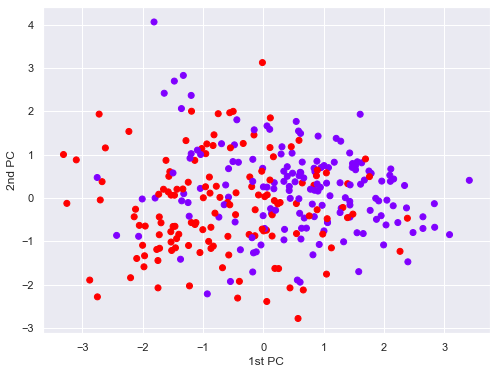

In [53]:
x_pca.shape
plt.figure(figsize=(8,6))
plt.scatter(x=x_pca[:,0], y=x_pca[:,1], c=newCleveland['num'], cmap='rainbow')
plt.xlabel('1st PC')
plt.ylabel('2nd PC')

In [54]:
pca.explained_variance_ratio_

array([0.35937581, 0.21941782])

In [55]:
pca.components_
df_comp = pd.DataFrame(pca.components_,  columns=numerical)
df_comp


age  trestbps      chol   thalach   oldpeak
0 -0.566788 -0.387830 -0.230767  0.507857 -0.466011
1  0.122913  0.419141  0.692872  0.469342 -0.329938

<AxesSubplot:>

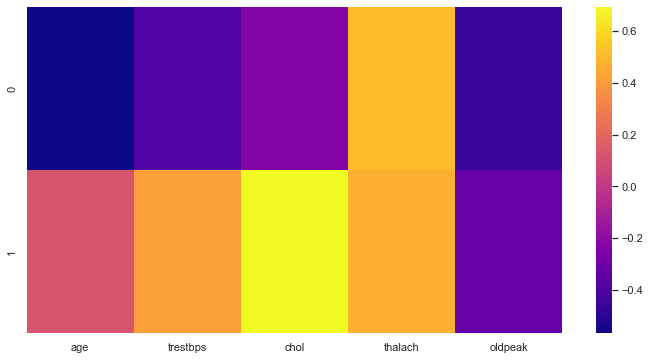

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')